# Decision Tree Project 

Just follow the directions below.

**Build a classification model with Decision Trees. The  main objective is to use the two splitting criteria of Gini index and Gain ratio and and observe the performance of the decision tree on the given data set.
It is a real dataset about the students' knowledge status about the subject of Electrical DC Machines.**

# Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
#loading libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Predict_student_ knowledge_level.csv")
df.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,NaN
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,NaN
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,NaN
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,NaN
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,NaN


In [3]:
df.isnull().sum()

STG             0
SCG             0
STR             0
LPR             0
PEG             0
 UNS            0
Unnamed: 6    403
Unnamed: 7    403
Unnamed: 8    403
dtype: int64

In [4]:
df.describe()

,STG,SCG,STR,LPR,PEG,Unnamed: 6,Unnamed: 7,Unnamed: 8
count,403.000000,403.000000,403.000000,403.000000,403.000000,0.0,0.0,0.0
mean,0.353141,0.355940,0.457655,0.431342,0.456360,NaN,NaN,NaN
std,0.212018,0.215531,0.246684,0.257545,0.266775,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.200000,0.200000,0.265000,0.250000,0.250000,NaN,NaN,NaN
50%,0.300000,0.300000,0.440000,0.330000,0.400000,NaN,NaN,NaN
75%,0.480000,0.510000,0.680000,0.650000,0.660000,NaN,NaN,NaN
max,0.990000,0.900000,0.950000,0.990000,0.990000,NaN,NaN,NaN


# Q-1: Load the dataset and print the metadata in the notebook. - 1Mark

In [5]:
df = df.drop(['Unnamed: 8','Unnamed: 7','Unnamed: 6'],axis=1)

In [6]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [7]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


# Q-2: Print a heatmap to check NULL values and Correlation values. - 1Mark

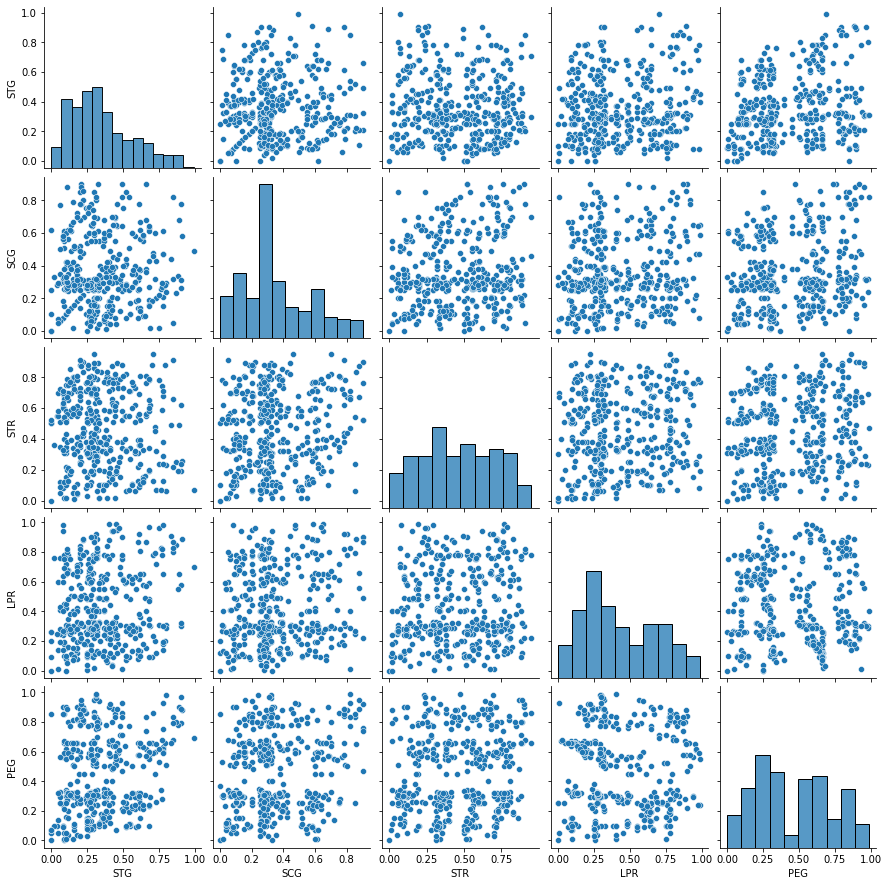

In [8]:
sns.pairplot(df[df.select_dtypes(include=[np.number]).columns])

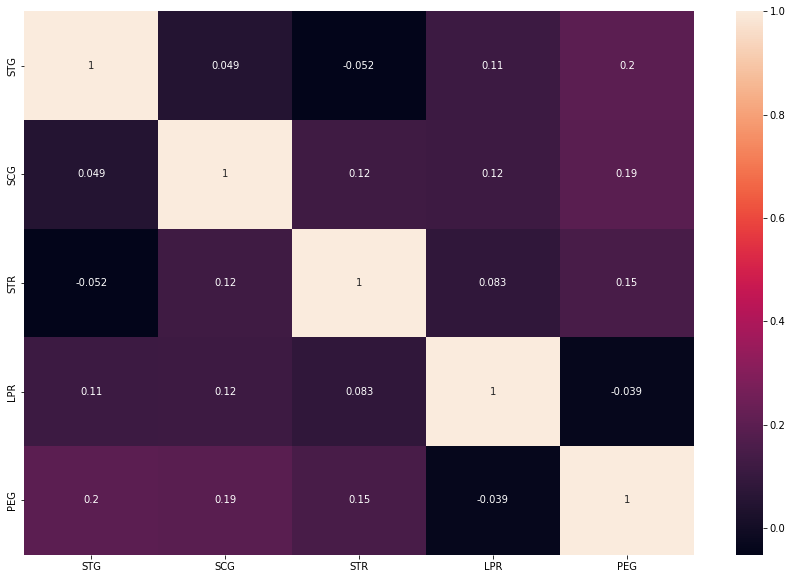

In [9]:
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

plt.show()

# Q-3: Perform stratified splitting of train and test data to ensure similar class distribution. 1Mark

In [10]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [11]:
features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
X = df[features]
y = df[' UNS']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Q-4: Build a classifier model using gini index and Decision Tree algorithm and plot the same. - (1+1)Marks

In [13]:
model_dt = DecisionTreeClassifier()

In [14]:
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9090909090909091

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.96      1.00      0.98        27
         Low       0.92      0.89      0.90        37
      Middle       0.93      0.98      0.95        43
    Very Low       0.50      0.40      0.44         5
    very_low       0.75      0.67      0.71         9

    accuracy                           0.91       121
   macro avg       0.81      0.79      0.80       121
weighted avg       0.90      0.91      0.91       121



# Q-5: Build a classifier model using gain ratio and Decision Tree algorithm and plot the same - (1+1) Marks

In [16]:
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [17]:
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


# Q-6: Print confusion matrix and classification report before and after pruning the Decision tree. Write down your observations on the effects of pruning. - (1+1)Marks

# Q-7: Compare the influence of gain ratio and gini index on the performance of the algorithm - 1 Mark.
